# Mean Force Integration

Import HILLS and COLVAR files, compute the mean force and integrate using the pyMFI (would be) module. 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
if 'path' in locals():
    os.chdir(path)
    print("The path is:", path)
else: 
    os.chdir("../")
    path = os.getcwd()
    print("The path is:", path)
from pyMFI import MFI
from pyMFI import run_plumed
path = os.getcwd()
if os.path.isdir("Notebooks/results_plot") == False: os.mkdir("Notebooks/results_plot")

The path is: /home/ucecabj/Desktop/pyMFI_git


### 2D - Periodic CV space example - Alanine Dipeptide. 

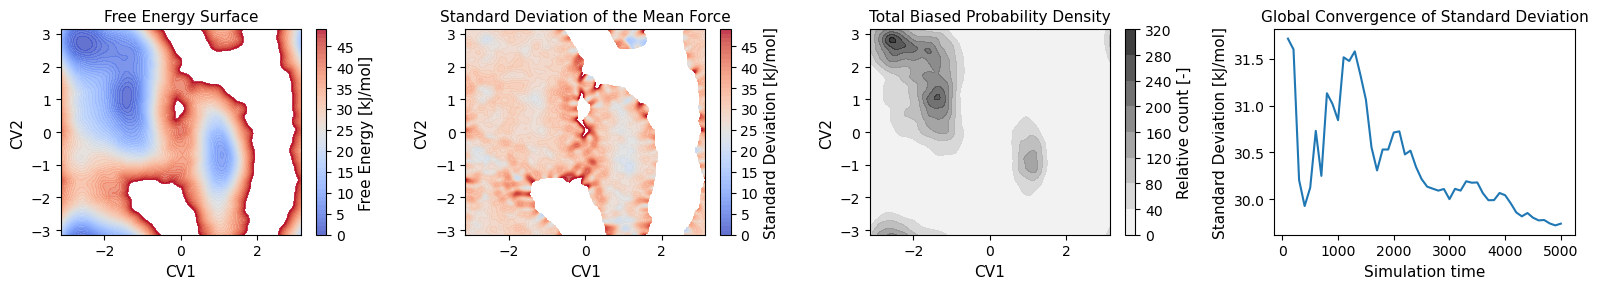

In [3]:
os.chdir(path)
os.chdir("/home/ucecabj/Desktop/pyMFI_git/DATA_examples/AlanineDipeptide_pyMFI")

#Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name="HILLS40")

#Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name="position40")

#Compute the time-independent mean force
results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = np.array((0.1,0.1)), kT = 2.49, error_pace = 100, WellTempered=1, nhills=5000, periodic = np.array((1,1)))
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results

#integration with the FFT method
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y, min_grid=np.array((-np.pi, -np.pi)), max_grid=np.array((np.pi, np.pi)), periodic = np.array((1,1)))

# Plot Recap
MFI.plot_recap_2D(X, Y, FES, Ftot_den, ofe, ofe_history, time_history)

### 2D - Non-periodic case | Bjola potential

(200, 200)
|**************************************************| 100% | Average Mean Force Error: 11.446

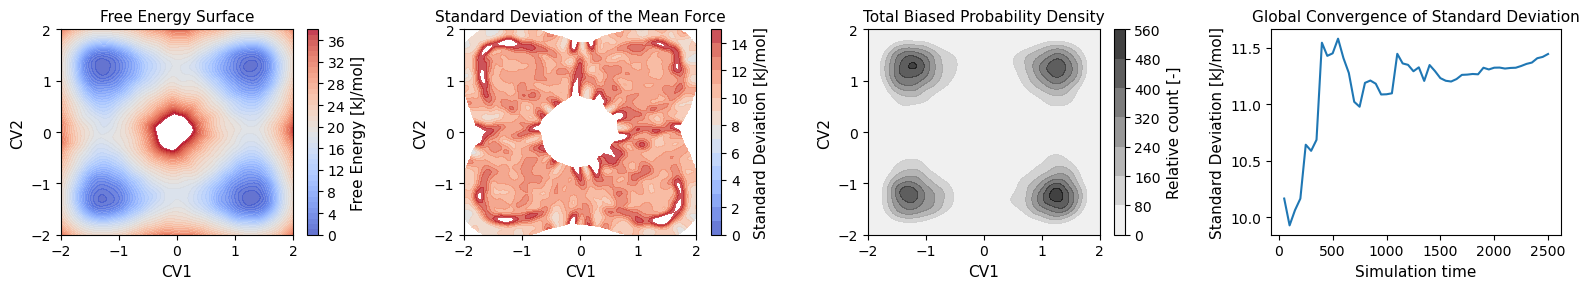

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pyMFI import MFI
from pyMFI import langevin
os.chdir("/home/ucecabj/Desktop/pyMFI_git/DATA_examples/Antoniu_2D_potential")


#Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name="HILLS_potential")

#Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name="position_potential")

#Compute the time-independent mean force
results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = np.array((0.1,0.1)), kT = 1, error_pace = 100, nhills=5000, min_grid=np.array((-2, -2)), max_grid=np.array((2, 2)), nbins=np.array((200, 200)))
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results

#integration on a periodic domain
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y, min_grid=np.array((-2, -2)), max_grid=np.array((2, 2)), periodic=[0,0])

# Plot Recap
MFI.plot_recap_2D(X, Y, FES, Ftot_den, ofe, ofe_history, time_history, FES_lim=39, ofe_map_lim=16)

### 2D patching independent,  short simulations | Bjola potential

Simulation: 0(200, 200)
|**************************************************| 100% | Average Mean Force Error: 10.4Simulation: 1(200, 200)
|**************************************************| 100% | Average Mean Force Error: 10.531Simulation: 2(200, 200)
|**************************************************| 100% | Average Mean Force Error: 10.244Simulation: 3(200, 200)
|**************************************************| 100% | Average Mean Force Error: 11.734Simulation: 4(200, 200)
|**************************************************| 100% | Average Mean Force Error: 10.513Simulation: 5(200, 200)
|**************************************************| 100% | Average Mean Force Error: 11.485Simulation: 6(200, 200)
|**************************************************| 100% | Average Mean Force Error: 10.679Simulation: 7(200, 200)
|**************************************************| 100% | Average Mean Force Error: 11.223Simulation: 8(200, 200)
|*************************************************

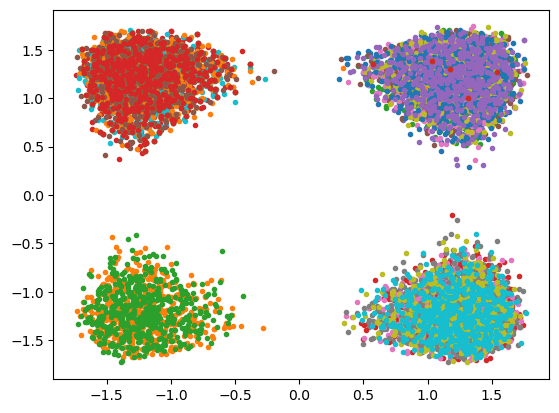

In [5]:
os.chdir("/home/ucecabj/Desktop/pyMFI_git/DATA_examples/Antoniu_2D_potential")
master = []

for simulation in np.arange(0,24): 
    #RUN short sim from random location
    # ipos=1.3*(2 * np.random.rand(2) - 1)    
    # run_plumed.run_langevin2D(simulation_steps = 50000, initial_position_x=ipos[0], initial_position_y=ipos[1], gaus_width_x=0.1, gaus_width_y=0.1, gaus_height=2, biasfactor=20, gaus_pace=100, file_extension=str(simulation))
    #langevin.run_2D(ipos=ipos,tag=simulation)
    
    #Read the position and HILLS file
    print('Simulation: '+str(simulation), end="")
    [position_x, position_y] = MFI.load_position_2D(position_name="position_"+str(simulation))
    HILLS=MFI.load_HILLS_2D(hills_name="HILLS_"+str(simulation))
    plt.plot(HILLS[:,1],HILLS[:,2],'.')

    #COMPUTE Mean force and weight of the simulation
    results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = [0.1, 0.1], kT = 1, error_pace = 500, nhills=-1, min_grid=np.array((-2, -2)), max_grid=np.array((2, 2)), nbins=np.array((200, 200)))
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results
    master.append([Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y])


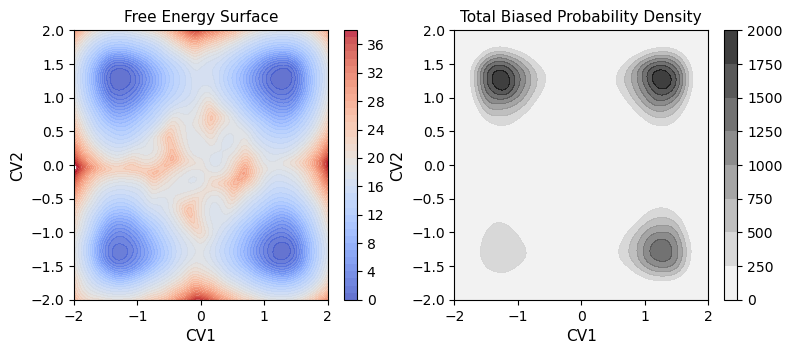

In [6]:
#Patch
[Ftot_den_patch, Ftot_den2_patch, Ftot_x_patch, Ftot_y_patch, ofv_num_x_patch, ofv_num_y_patch] = MFI.patch_2D(master)

#integration on a periodic domain
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x_patch, Ftot_y_patch, min_grid=np.array((-2, -2)), max_grid=np.array((2, 2)))

# Plot Recap
MFI.plot_patch_2D(X, Y, FES, Ftot_den_patch, lim=39)


### 2D - Non-periodic case | Invernizzi potential

Simulation: 0(200, 200)
|**************************************************| 100% | Average Mean Force Error: 9.724Simulation: 1(200, 200)
|**************************************************| 100% | Average Mean Force Error: 9.887Simulation: 2(200, 200)
|**************************************************| 100% | Average Mean Force Error: 9.744Simulation: 3(200, 200)
|**************************************************| 100% | Average Mean Force Error: 9.795Simulation: 4(200, 200)
|**************************************************| 100% | Average Mean Force Error: 10.032Simulation: 5(200, 200)
|**************************************************| 100% | Average Mean Force Error: 9.207Simulation: 6(200, 200)
|**************************************************| 100% | Average Mean Force Error: 9.454Simulation: 7(200, 200)
|**************************************************| 100% | Average Mean Force Error: 10.349Simulation: 8(200, 200)
|**************************************************| 1

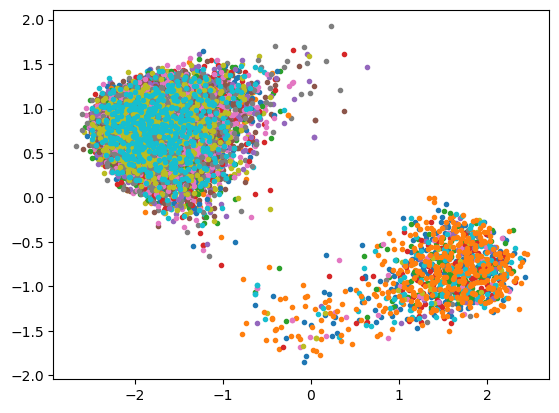

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pyMFI import MFI
from pyMFI import langevin

os.chdir("/home/ucecabj/Desktop/pyMFI_git/DATA_examples/Invernizzi_2D_potential_more_data")


master = []

for simulation in np.arange(0,20): 
    #RUN short sim from random location
    # ipos=1.3*(2 * np.random.rand(2) - 1)
    # run_plumed.run_2D_Invernizzi(simulation_steps=100000, sigma=0.1, height=0.8, biasfactor=10, initial_position_x=ipos[0], initial_position_y=[1], file_extension=str(simulation))
    
    #Read the position and HILLS file
    print('Simulation: '+str(simulation), end="")
    [position_x, position_y] = MFI.load_position_2D(position_name="positioninve_"+str(simulation))
    HILLS=MFI.load_HILLS_2D(hills_name="HILLSinve_"+str(simulation))
    plt.plot(HILLS[:,1],HILLS[:,2],'.')  
    
    #COMPUTE Mean force and weight of the simulation
    results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = [0.12, 0.12], kT = 1, error_pace = 500, nhills=-1, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)), nbins=np.array((200, 200)), FES_cutoff = 20)
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results
    master.append([Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y])    
    

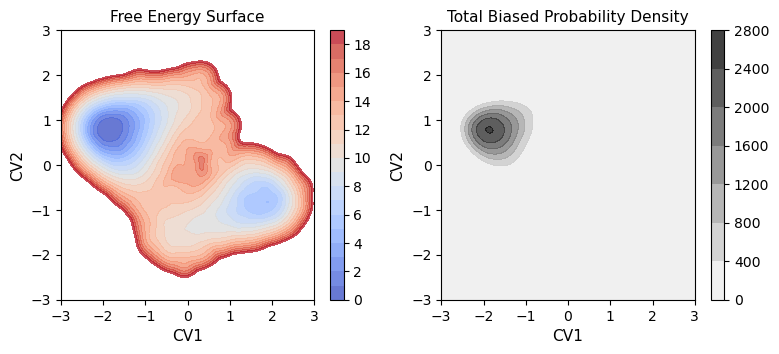

In [9]:
#Patch
[Ftot_den_patch, Ftot_den2_patch, Ftot_x_patch, Ftot_y_patch, ofv_num_x_patch, ofv_num_y_patch] = MFI.patch_2D(master)

#integration on a periodic domain
[X, Y, FES] = MFI.intgrad2(Ftot_x_patch, Ftot_y_patch, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)))

# Plot Recap
MFI.plot_patch_2D(X, Y, FES, Ftot_den_patch,lim=20)


### Bootstrap Error of the Invernizzi potential

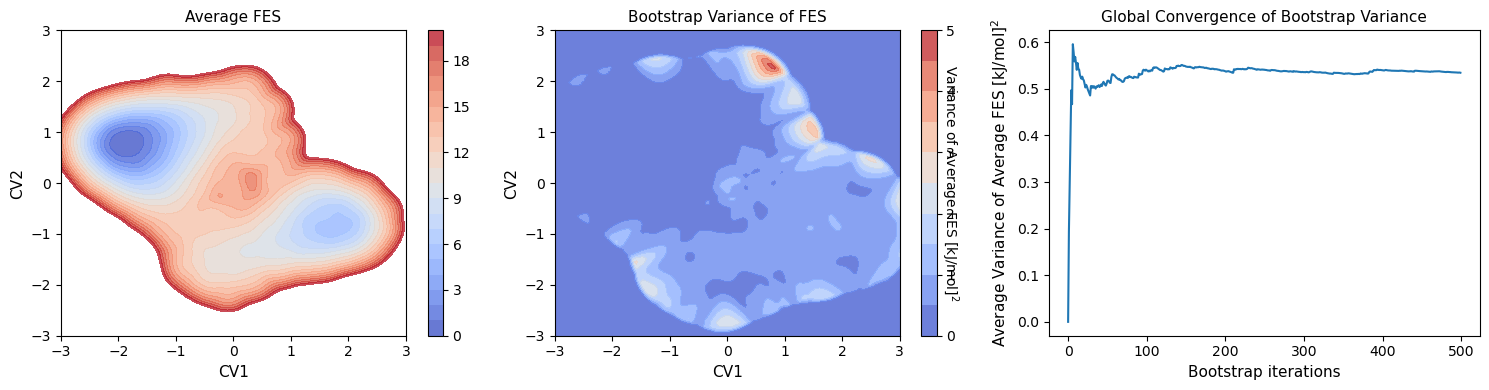

In [16]:
# # #Load master terms if not available
# # master = MFI.load_pkl("/home/ucecabj/Desktop/pyMFI_git/DATA_examples/Invernizzi_2D_potential/master_inv")

#Select force terms
master_array = np.asarray(master)
forces_all = master_array[:, [0,2,3], :]

#Run Bootstrap 
[FES_avr, sd_fes, sd_fes_prog ] = MFI.bootstrap_2D_new(X, Y, forces_all, n_bootstrap=500)

#Plot
MFI.plot_bootstrap(X, Y, FES_avr, MFI.zero_to_nan(sd_fes), sd_fes_prog, FES_lim=20, sd_lim=5, FES_levels=21, sd_levels=11)
plt.tight_layout()